In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

In [39]:
data = pd.read_csv("../data/tracks_with_genres.csv")
#Keep only numerical values data
input_data = data[['instrumentalness', 'acousticness', 'tempo']]

data_values = input_data.values
data_values = (data_values - data_values.mean(axis=0))/data_values.std(axis=0)

In [50]:
som_shape = (7,7)

som = MiniSom(som_shape[0], som_shape[1], data_values.shape[1], sigma=1, learning_rate=.001,
              neighborhood_function='gaussian')
som.random_weights_init(data_values)
som.train_batch(data_values, 500000, verbose=True)

 [ 500000 / 500000 ] 100% - 0:00:00 left 
 quantization error: 0.3047166079798198


In [51]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data_values]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

/home/jonathan/.virtualenvs/project/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


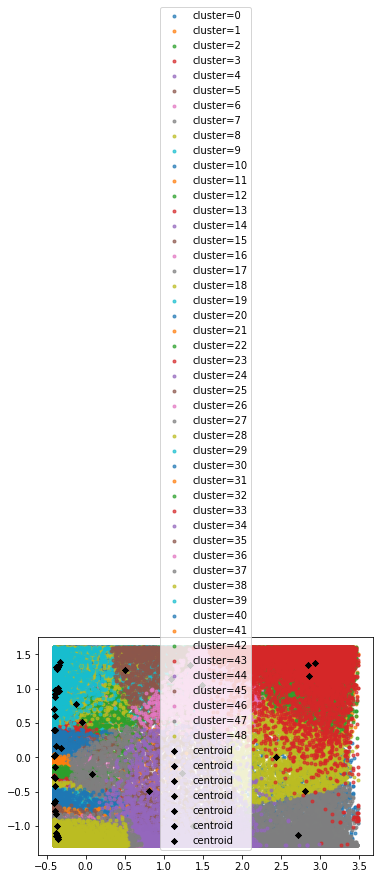

In [52]:
# plotting the clusters using the first 2 dimensions of the data
for c in np.unique(cluster_index):
    plt.scatter(data_values[cluster_index == c, 0],
                data_values[cluster_index == c, 1], marker='.', label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=5, color='k', label='centroid')
plt.legend();

